In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


### (1) Data visualization: 
#### Plot a 2-D scatter plot of the data. Provide explainations and insights regarding the resulting scatter plot.

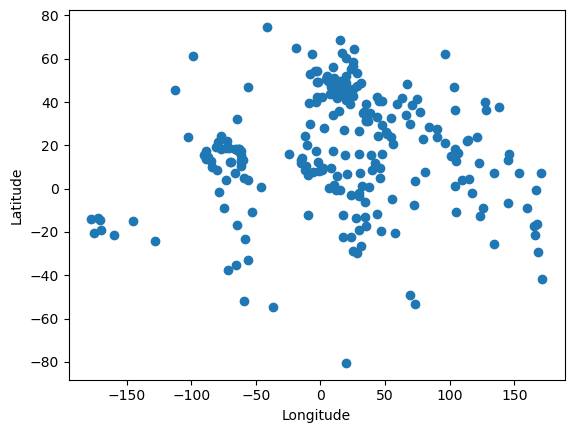

In [4]:
plt.scatter(data.iloc[:,1], data.iloc[:,2])
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.show()

From the scatter plot, it can be observed that it represents the different countries around the globe. More the number of countries, more the number of dots. Thus, it can be seen that Europe has quite a lot many points clustered together since Europe consists of many countries bound together in a small area. Same can be observed for Africa or South America. Despite Asia being the largest landmass, since countries are scatters, so are the dots. Same can be said for North America. Russia has a sole dot. On similar thought, one cannot differentiate between an island to a single large country/continent. For example, Australia and New Zealand are marked as two separate entities, while nothing can be said for the island nation of Malaysia or Indonesia.

### (2) K-Means Clustering:
#### Apply K-Means clustering to group the samples of the dataset using K = 2; 3; 4; : : : ; 10. Provide the color-coded scatter plots for each K, where each color in the scatter plot represents a cluster.

In [5]:
from sklearn.cluster import KMeans

In [6]:
df = data.iloc[:,[1,2]]

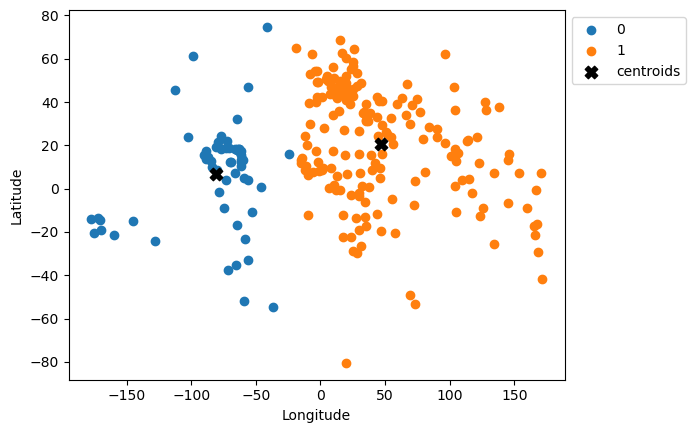

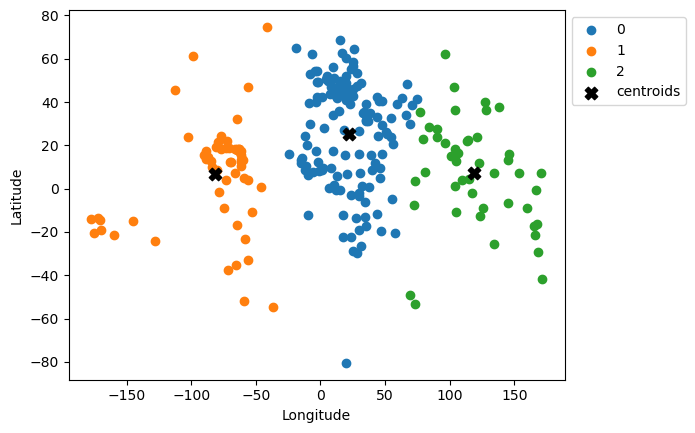

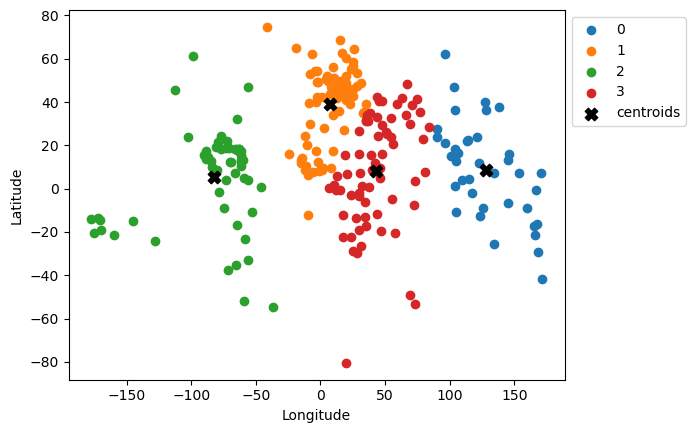

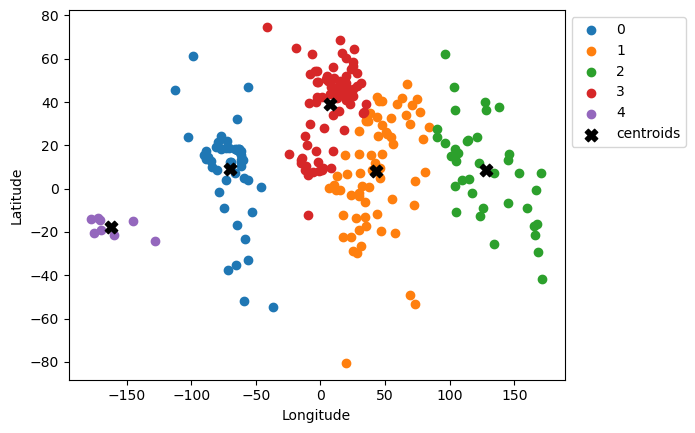

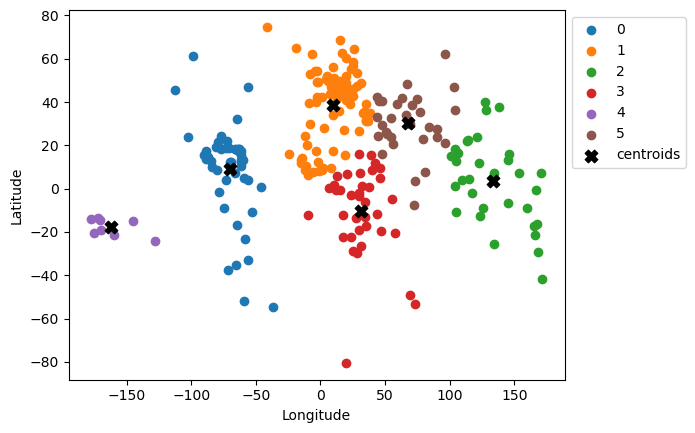

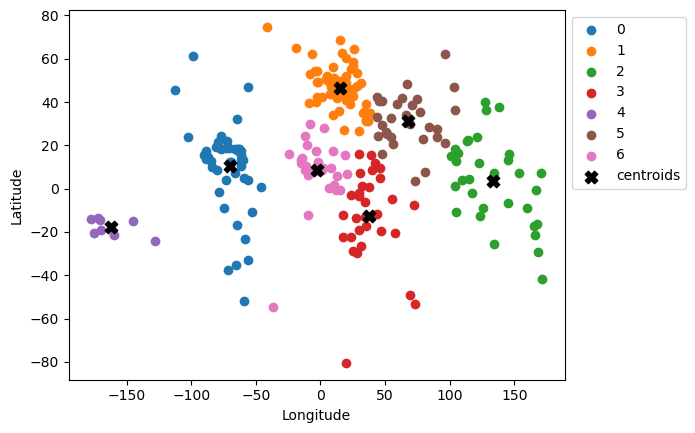

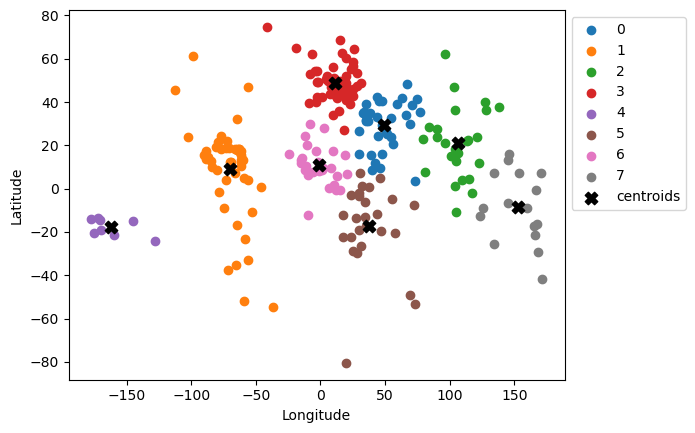

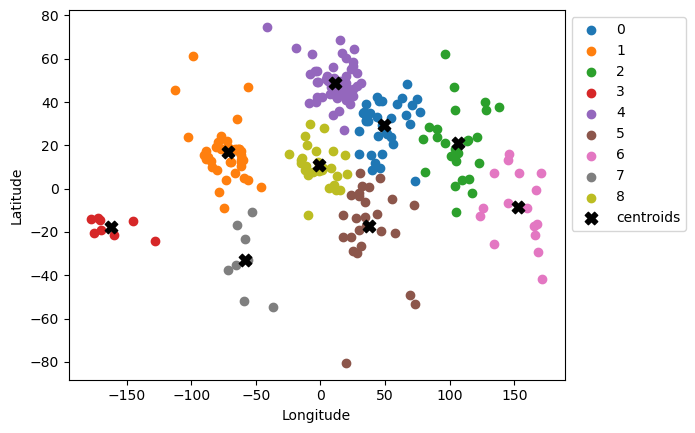

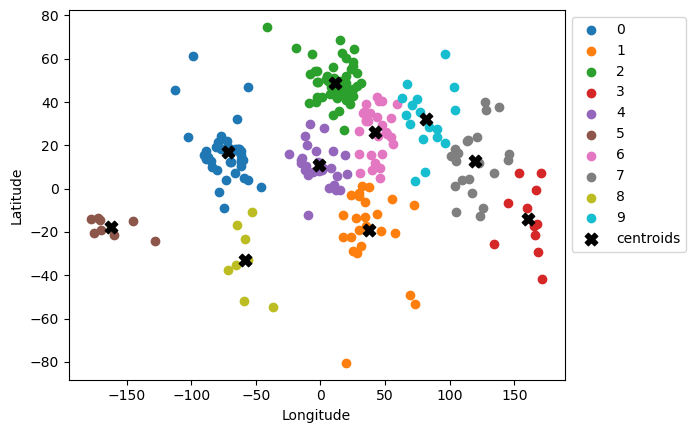

In [7]:
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,max_iter=1000,n_init=50,random_state=0)
    label = kmeans.fit_predict(df)
    u_labels = np.unique(label)
    plt.figure()
    for i in u_labels:
        plt.scatter(df.iloc[label == i,0] , df.iloc[label == i,1] , label = i)
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X",c="black", label="centroids", s=80)
    plt.ylabel("Latitude")
    plt.xlabel("Longitude")
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    plt.show()

### (3) Elbow method for K-Means Clustering: 
#### Based on the scatter plots from question (2) and using the elbow method, determine and discuss the number of clusters that makes most sense for the data.

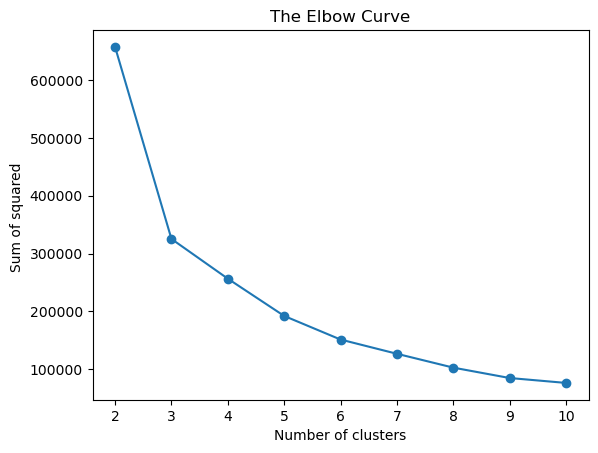

In [8]:
SSE = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=1000,n_init=50,random_state=0)
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
plt.plot(range(2,11),SSE)
plt.scatter(range(2,11),SSE)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared ') ##WCSS stands for total within-cluster sum of square
plt.show()   

From the Elbow curve, the number of clusters that would make the most sense is between 3-5, but if we have to choose, then 3 would be the one(there is a signifact change in the angle of the cure). However, just by eyeballing the scatter plot, and the data, it can be fairly seen that taking the number of clusters as 5 would make the most sense, since not only the countries would be separated geographically as per the real time longitude and latitude, but also each cluster would still be under limited error threshold for classification of other points and there would be a high probablity that the place is classified by the model is correctly assigned to the actual real world cluster.

### (4) Clustering with Gaussian Mixture Models:
#### Apply a Gaussian mixture models using 5 Gaussians to group the samples of the dataset. Report the mean and covariance of each Gaussian and briefy discuss these results. How does this clustering result compare to the one obtained by the K-Means algorithm? Please also examine and discuss the log-likelihood of a sample belonging to each Gaussian for 1-2 samples.

In [9]:
from sklearn.mixture import GaussianMixture

In [10]:
gm = GaussianMixture(n_components=5, random_state=42).fit(df)

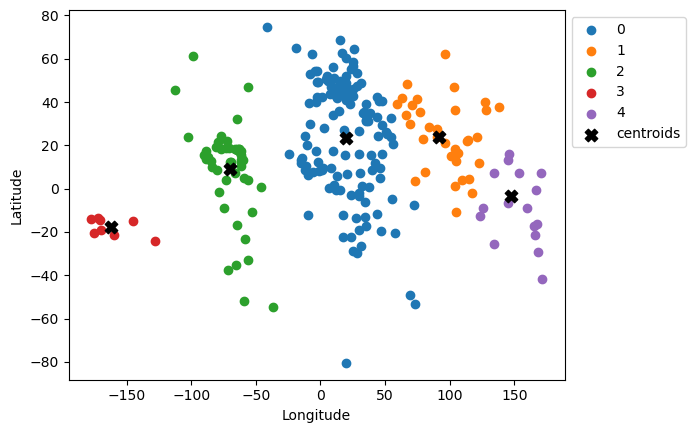

In [11]:
label = gm.fit_predict(df)
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df.iloc[label == i,0] , df.iloc[label == i,1] , label = i)
plt.scatter(gm.means_[:,0], gm.means_[:,1], marker="X",c="black", label="centroids", s=80)
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

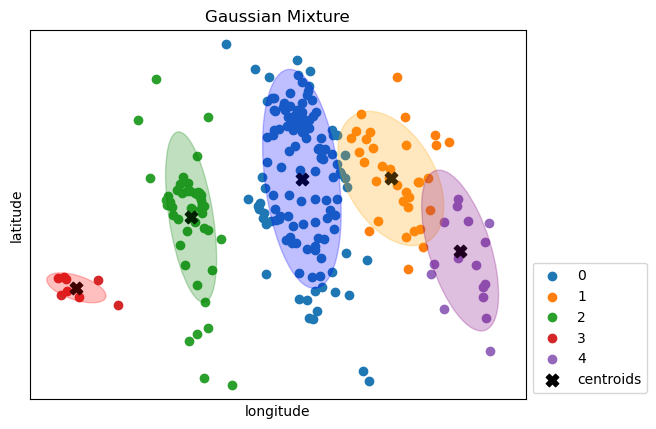

In [25]:
import matplotlib as mpl
from scipy import linalg
import itertools

color_iter = (["blue", "orange", "green", "red", "purple"])

def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(1, 1, 1)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2.1 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])  
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi
        
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.25)
        splot.add_artist(ell)

    for i in u_labels:
        plt.scatter(df.iloc[label == i,0] , df.iloc[label == i,1] , label = i)
    plt.scatter(gm.means_[:,0], gm.means_[:,1], marker="X",c="black", label="centroids", s=80)
    plt.xlim(-200, 200)
    plt.ylim(-60, 80)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    plt.legend(bbox_to_anchor=(1,0), loc="lower left")
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.show()
    
plot_results(df, gm.predict(df), gm.means_, gm.covariances_, 0, "Gaussian Mixture")

In [23]:
df2 = pd.DataFrame(gm.means_)
df2["center covariance"] = [gm.covariances_[i][1][0] for i in range(5)]
df2 = df2.rename(columns = {0:"center(mean) longitude", 1: 'center(mean) latitude', 'center covariance':'covariance'})
df2.head()

,center(mean) longitude,center(mean) latitude,covariance
0,19.640077,23.557331,-184.658390
1,91.344913,23.694537,-202.613240
2,-69.716981,9.087281,-146.385873
3,-162.240035,-17.716189,-33.009792
4,147.241468,-3.594765,-234.891374


In [31]:
gm.covariances_[0]

array([[ 455.56378089, -184.6583895 ],
       [-184.6583895 ,  779.61855833]])

In [32]:
gm.covariances_[1]

array([[ 825.54355304, -202.61323962],
       [-202.61323962,  293.63883194]])

In [33]:
gm.covariances_[2]

array([[ 192.19834557, -146.38587303],
       [-146.38587303,  472.10039597]])

In [34]:
gm.covariances_[3]

array([[259.01841824, -33.00979178],
       [-33.00979178,  14.57255797]])

In [35]:
gm.covariances_[4]

array([[ 436.71361262, -234.89137398],
       [-234.89137398,  420.59870491]])

With the covariance matrix, ellipses were plotted on top of the scatter plot, showing the clusters for GMM model with k = 5. The major, minor axis and the tilt of the major axis were determined from the eigen vectors of the covariance matrix. From the covariance values between longitude(X) and latitude(Y), it is evident that the tilt of the ellipses are to be towards left which can also be seen from the plot. Further more, the diagonal elements of the covariance matrix are not of same magnitude, showing the the resulted figure (circle or ellipse) would be skewed in one of the directions.

These results are better compared to K-Means with number of clusters = 5, since K-Means considers the distribution to be a circle (equidistant from the center wrt all features) than an ellipse, for 2D data, thus making stronger assumptions about the data. GMM on the other hand is able to capture better patterns due the a weaker assumption of Gaussian distribution. From the scatter plots, this inference can be observed. K-means has clustered Europe and part Africa in one group while part Asia and part Africa in another, which doesnt make much sense in real world geographical catergorization, while GMM has a complete separation of the continents based on the amount of countries present in nearer to each other.

In [144]:
cluster0 = [df.iloc[data[data["name"] == "Egypt"].index.values[0]], df.iloc[data[data["name"] == "South Africa"].index.values[0]]]
cluster1 = [df.iloc[data[data["name"] == "Bangladesh"].index.values[0]], df.iloc[data[data["name"] == "Russia"].index.values[0]]]
cluster2 = [df.iloc[data[data["name"] == "Argentina"].index.values[0]], df.iloc[data[data["name"] == "Mexico"].index.values[0]]]
cluster3 = [df.iloc[data[data["name"] == "Egypt"].index.values[0]], df.iloc[data[data["name"] == "South Africa"].index.values[0]]]
cluster4 = [df.iloc[data[data["name"] == "Niue"].index.values[0]], df.iloc[data[data["name"] == "Samoa"].index.values[0]]]

print(gm.score_samples(cluster0))

[ -8.93287346 -10.64439871]


In [145]:
print(gm.score_samples(cluster1))

[ -9.81500348 -12.999679  ]


In [146]:
print(gm.score_samples(cluster2))

[-11.33205148 -11.88830765]


In [147]:
print(gm.score_samples(cluster3))

[ -8.93287346 -10.64439871]


In [148]:
print(gm.score_samples(cluster4))

[-9.55973218 -9.7322264 ]


It can be seen from the log-likelihood for 2 samples per Gaussian cluster that values that belong to closer to the center of the cluster have a higher log likelihood values compared to the ones which are away from the center. For example, for cluster0 Egypt is nearer to center as compared to South Africa. This is evident from the log likelihood value as well, with Egypt having a value of -8.9 while South Africa having a value of -10.66. Same can be said for all the clusters such as for Bangladesh and Russia for cluster 1.